In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Unziping Data from archive.zip
!unzip -u "/content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive.zip" -d "/content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive/Train/5/00005_00043_00004.png  
  inflating: /content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive/Train/5/00005_00043_00006.png  
  inflating: /content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive/Train/5/00005_00043_00007.png  
  inflating: /content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive/Train/5/00005_00043_00010.png  
  inflating: /content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive/Train/5/00005_00043_00011.png  
  inflating: /content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive/Train/5/00005_00043_00013.png  
  inflating: /content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive/Train/5/00005_00043_00014.png  
  inflating: /content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive/Train/5/00005_00043_00016.png  
  inflating: /content/drive/MyDrive/AI_Projects/TrafficSignsC

### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image 
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

### Load Data

In [4]:
# List to store image data
data = []
# List to store image labels (classes)
labels = []
# Number of classes
classes = 43
# Current path of the dataset
current_path = '/content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive'


# Iterates between 0 and 42 (43 classes)
for i in range(classes):
    
    # Path of each image
    path = os.path.join(current_path, 'Train', str(i))
    images = os.listdir(path)
    
    # Iterates between each image
    for a in images:
        # Try to load the images
        try:
            # Open the image
            image = Image.open(path + '/' + a)
            # Resizes the image to 30x30
            image = image.resize((30, 30))
            # Turns the image into an array
            image = np.array(image)
            # Append the image to "data" list
            data.append(image)
            # Append the label to "labels" list
            labels.append(i)
        # If it doesn't work, shows an error message
        except:
            print('Error loading images!')

# Turns lists into array
data = np.array(data)
labels = np.array(labels)

In [5]:
print('DATA SHAPE: ', data.shape)
print('LABELS SHAPE', labels.shape)

DATA SHAPE:  (39209, 30, 30, 3)
LABELS SHAPE (39209,)


### Split Data

In [6]:
# 20% to train
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state=42)

print(X_train.shape,'|', X_test.shape,'|',y_train.shape,'|',y_test.shape)

# Use "to_categorical" method to convert the labels present in y_train and y_test into one-hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) | (7842, 30, 30, 3) | (31367,) | (7842,)


### Modelling

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

### Compile the model

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train and Validate Model

In [10]:
# 15 epochs
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
491/491 [==============================] - 19s 13ms/step - loss: 2.7188 - accuracy: 0.3635 - val_loss: 0.9347 - val_accuracy: 0.7805
Epoch 2/20
491/491 [==============================] - 6s 11ms/step - loss: 1.0990 - accuracy: 0.6944 - val_loss: 0.5139 - val_accuracy: 0.8824
Epoch 3/20
491/491 [==============================] - 6s 11ms/step - loss: 0.6258 - accuracy: 0.8215 - val_loss: 0.1898 - val_accuracy: 0.9574
Epoch 4/20
491/491 [==============================] - 6s 12ms/step - loss: 0.4527 - accuracy: 0.8718 - val_loss: 0.1179 - val_accuracy: 0.9712
Epoch 5/20
491/491 [==============================] - 6s 12ms/step - loss: 0.3580 - accuracy: 0.8997 - val_loss: 0.0823 - val_accuracy: 0.9797
Epoch 6/20
491/491 [==============================] - 6s 12ms/step - loss: 0.2973 - accuracy: 0.9149 - val_loss: 0.0665 - val_accuracy: 0.9836
Epoch 7/20
491/491 [==============================] - 7s 14ms/step - loss: 0.2544 - accuracy: 0.9301 - val_loss: 0.0589 - val_accuracy: 0.984

### Plot results

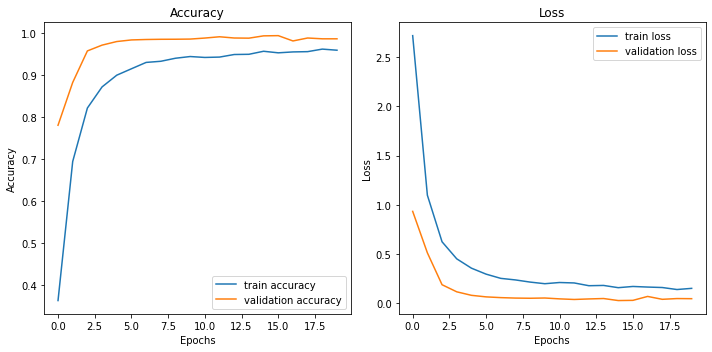

In [11]:
# Figure size
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# Plot train and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
# Plot loss and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Test model with test dataset

In [12]:
# read test.csv file
y_test = pd.read_csv('/content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive/Test.csv')
y_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


### Evaluate

In [13]:
# Target
labels = y_test['ClassId'].values
# Test data path
current_path = '/content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/archive/'
# Images path
imgs = current_path + y_test['Path'].values

# Store image data
data = []


for img in imgs:
    # Open image
    image = Image.open(img)
    # Resize to 30x30
    image = image.resize((30, 30))
    # Append in "data" list
    data.append(np.array(image))
    
# Convert "data" list to array
X_test = np.array(data)

# Make predictions
preds = model.predict(X_test)
preds=np.argmax(preds, axis=1)

# Evaluate model
print('ACCURACY: {} %'.format(round(accuracy_score(labels, preds) * 100, 3)))

ACCURACY: 95.384 %


# Save Model

In [14]:
model.save('/content/drive/MyDrive/AI_Projects/TrafficSignsClassifier/traffic_classifier.h5')

# Tkinter GUI

In [71]:
# Libraries
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model

# Load your model
model = load_model('traffic_classifier.h5') # Path to your model

# Dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

# Initialise GUI
top=tk.Tk()
# Window dimensions (800x600)
top.geometry('800x600')
# Window title
top.title('Traffic sign classification')
# Window background color
top.configure(background='#CDCDCD')
# Window label
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
# Sign image
sign_image = Label(top)


# Function to classify image
def classify(file_path):
    global label_packed
    # Open the image file path
    image = Image.open(file_path)
    # Resize the image
    image = image.resize((30,30))
    # Inserts a new axis that will appear at the axis position in the expanded array shape
    image = numpy.expand_dims(image, axis=0)
    # Convert to numpy array
    image = numpy.array(image)
    # Make prediction
    predictions = model.predict([image])
    pred = numpy.argmax(predictions,axis=1)
    sign = classes[int(pred)+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
    
# Function to show the "classify" button
def show_classify_button(file_path):
    # Create the button
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    # Configure button colors
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    # Configure button place (location)
    classify_b.place(relx=0.79,rely=0.46)
    
# Function to upload image
def upload_image():
    try:
        # Path of the image
        file_path=filedialog.askopenfilename()
        # Open file path
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
    
# Create "Upload" button
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
# "Upload" button colors and font
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
# Button location
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
# Window title text
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
# Window colors
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Keep right
